In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [18]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegi_benchmark.csv")
vegi_df = vegi_df.drop(columns="Unnamed: 0")
vegi_df.head(10)

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,Label,Image
0,131,97,131,98,59,0,0,0.805619,Kartoffel,Kartoffel_0
1,128,111,141,106,61,0,0,0.796523,Kartoffel,Kartoffel_1
2,152,116,148,118,75,0,0,0.787971,Kartoffel,Kartoffel_2
3,111,108,153,122,76,0,0,0.794086,Kartoffel,Kartoffel_3
4,131,114,144,112,68,0,0,0.037900,Kartoffel,Kartoffel_4
5,220,136,155,125,78,0,0,0.780966,Kartoffel,Kartoffel_5
6,180,116,152,120,72,0,0,0.787716,Kartoffel,Kartoffel_6
7,177,116,143,111,68,0,0,0.792105,Kartoffel,Kartoffel_7
8,209,149,126,94,55,0,0,0.308677,Kartoffel,Kartoffel_8
9,195,137,127,96,59,0,0,0.792121,Kartoffel,Kartoffel_9


In [19]:
vegi_df.describe()

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,163.554800,90.810535,118.825828,91.268479,59.108751,398.959218,413.304163,0.508776
std,68.565344,39.896281,25.272382,21.605956,18.096681,1503.508652,1346.475009,0.294930
min,45.000000,23.000000,27.000000,22.000000,12.000000,0.000000,0.000000,0.000000
25%,106.000000,59.000000,104.000000,77.000000,47.000000,0.000000,0.000000,0.253772
50%,158.000000,83.000000,120.000000,88.000000,58.000000,0.000000,0.000000,0.630301
75%,226.000000,113.000000,137.000000,106.000000,69.000000,18.000000,7.000000,0.766996
max,328.000000,254.000000,192.000000,176.000000,209.000000,15120.000000,12765.000000,0.865544


In [20]:
vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 3

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
3    336
1    330
0    263
2    248
Name: count, dtype: int64

In [21]:
X = vegi_encoded_df.iloc[:, 0:8]
X.head()

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area
0,131,97,131,98,59,0,0,0.805619
1,128,111,141,106,61,0,0,0.796523
2,152,116,148,118,75,0,0,0.787971
3,111,108,153,122,76,0,0,0.794086
4,131,114,144,112,68,0,0,0.037900


In [16]:
#X_green_pixels = X.drop(columns="green pixels")
#X_green_pixels.head()

,Hight,Width,R,G,B,green onion pixels,ratio area
0,131,97,131,98,59,0,0.805619
1,128,111,141,106,61,0,0.796523
2,152,116,148,118,75,0,0.787971
3,111,108,153,122,76,0,0.794086
4,131,114,144,112,68,0,0.037900


In [22]:
y = vegi_encoded_df.iloc[:, 8:10]
y.head()

,Label,Image
0,1,Kartoffel_0
1,1,Kartoffel_1
2,1,Kartoffel_2
3,1,Kartoffel_3
4,1,Kartoffel_4


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area
715,124,108,91,50,53,143,0,0.772737
43,182,173,152,126,75,0,0,0.006177
461,274,53,74,62,57,3,0,0.667401
535,167,67,111,81,56,0,21,0.411163
380,251,59,154,89,24,0,0,0.785401
...,...,...,...,...,...,...,...,...
1044,226,119,101,87,76,624,718,0.325110
1095,119,98,137,104,67,0,0,0.809981
1130,136,114,134,105,67,0,0,0.802632
860,261,47,141,127,70,506,1940,0.473995


In [25]:
y_train

,Label,Image
715,2,Zwiebel_128
43,1,Kartoffel_44
461,0,Karotte_150
535,0,Karotte_224
380,0,Karotte_69
...,...,...
1044,3,Zwiebel_Trieb_69
1095,3,Kartoffel_Trieb_19
1130,3,Kartoffel_Trieb_54
860,3,Karotte_Trieb_150


In [26]:
image_names = y_train.iloc[:,1]
image_names

715            Zwiebel_128
43            Kartoffel_44
461            Karotte_150
535            Karotte_224
380             Karotte_69
               ...        
1044      Zwiebel_Trieb_69
1095    Kartoffel_Trieb_19
1130    Kartoffel_Trieb_54
860      Karotte_Trieb_150
1126    Kartoffel_Trieb_50
Name: Image, Length: 941, dtype: object

In [31]:
X_train_green_pixels = X_train.iloc[:, 5]
X_test_green_pixels = X_test.iloc[:, 5]

In [28]:
y_train_clean = y_train.drop(columns="Image")
y_train_clean

,Label
715,2
43,1
461,0
535,0
380,0
...,...
1044,3
1095,3
1130,3
860,3


In [32]:
X_train_clean = X_train.drop(columns="green pixels")
X_test_clean = X_test.drop(columns="green pixels")

In [35]:
image_names_test = y_test.iloc[:,1]
y_test_clean = y_test.drop(columns="Image")

In [38]:
X_train_copy = X_train_clean.copy()

col_names = ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels', 'ratio area']
features = X_train_copy[col_names]

ct = ColumnTransformer([
        ('standard1', StandardScaler(), ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels'])
    ], remainder='passthrough')

X_train_scaled = ct.fit_transform(features)

In [43]:

col_names = ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels', 'ratio area']
features_test = X_test_clean[col_names]
X_test_scaled = ct.transform(features_test)
X_test_scaled

array([[-1.03055472e+00, -3.47752543e-01, -3.90049319e-01, ...,
         5.94550401e-01, -2.95528110e-01,  6.28626692e-03],
       [-2.35808737e-01, -1.00474974e+00, -9.85887647e-01, ...,
        -1.64244251e+00, -2.95528110e-01,  3.97456280e-04],
       [-1.32490508e+00, -1.25744097e+00, -1.11991433e-01, ...,
         1.09787381e+00, -2.95528110e-01,  3.62557680e-03],
       ...,
       [-7.65639392e-01,  2.83975533e-01, -5.48939540e-01, ...,
        -1.25096875e+00, -2.95528110e-01,  6.80409664e-01],
       [-1.45736275e+00, -9.79480619e-01, -2.31159099e-01, ...,
        -5.79870878e-01, -2.95528110e-01,  7.54437870e-01],
       [ 1.17707301e+00,  4.35590271e-01, -1.93922897e+00, ...,
         1.47151819e-01,  1.16467138e+00,  2.46186248e-01]])

In [53]:
y_train_clean_2 = y_train_clean.to_numpy()

In [54]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train_scaled, y_train_clean_2)

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [55]:
print(clf.classes_)
print(clf.coef_[:10])

[0 1 2 3]
[[ 1.53783994 -1.33596548  0.71206697 -0.58488301 -0.1134967   1.29239088
   0.2872698 ]
 [-0.99746322  0.0965509  -2.60832024  3.85782243 -1.45226401 -2.20186173
   0.65853209]
 [-0.95963835  0.91025208  2.56192764 -4.10481919  1.78257535 -1.3254001
  -0.77854733]
 [ 0.41926163  0.3291625  -0.66567437  0.83187977 -0.21681464  2.23487095
  -0.16725456]]


In [56]:
pred_vegi = clf.predict(X_train_scaled[0].reshape(1, -1))
print(f"Predicted: {pred_vegi}. Groundtruth: {y_train_clean_2[0]}")

Predicted: [2]. Groundtruth: [2]


In [57]:
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

In [58]:
accuracy_testdata = accuracy_score(y_test_clean, y_test_pred)
accuracy_traindata = accuracy_score(y_train_clean_2, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

number_correct_testdata = accuracy_score(y_test_clean, y_test_pred, normalize=False)
number_correct_traindata = accuracy_score(y_train_clean_2, y_train_pred, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_testdata}\nNumber Correct Predicions Train: {number_correct_traindata}")

Accuracy Test: 0.7584745762711864
Accuracy Train: 0.7311370882040382
Number Correct Predicions Test: 179
Number Correct Predicions Train: 688


Vegis
[[39  3  3  7]
 [ 0 63  1  4]
 [ 5  8 33  1]
 [ 5 13  7 44]]


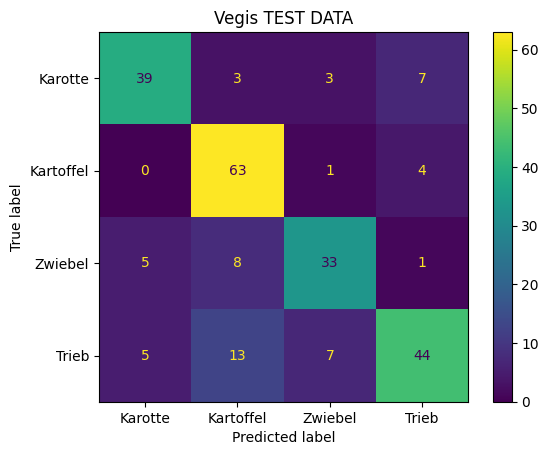

In [61]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test_scaled,
    y_test_clean,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

print("Vegis")
print(disp.confusion_matrix)

Vegis TRAIN
[[157   8  12  34]
 [  5 220   4  33]
 [ 12  16 156  17]
 [ 27  59  26 155]]


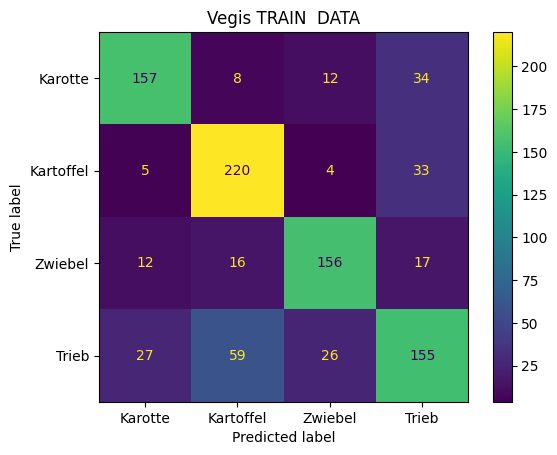

In [60]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train_scaled,
    y_train_clean,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

print("Vegis TRAIN")
print(disp.confusion_matrix)